<a href="https://colab.research.google.com/github/sanjiblama28/AI-Application-System/blob/main/week6%20(1)_939.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
learning_parameter = 0.01
epochs = 300


In [5]:
sample_points = 50
x_train = np.linspace(0,30,sample_points)
y_train = 6*x_train + 7*np.random.randn(sample_points)

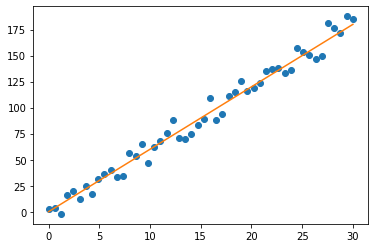

In [6]:
# Noisy dataset
plt.plot(x_train, y_train, 'o')
# Noise free dataset 
plt.plot(x_train, 6*x_train)
plt.show()

In [7]:
Y = tf.placeholder(tf.float32)
X = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name = 'weights')
B = tf.Variable(np.random.randn(), name = 'bias')


In [8]:
#Create the model for regression
prediction = W*X + B

# Cost function
cost_iteration = tf.reduce_sum((prediction-Y)**2)/(2*sample_points)

#Define the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

# Initialize the variables
init = tf.global_variables_initializer()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epochs 0.000000 Cost 0.690535 Weight 5.904982 Bias -0.525628
Epochs 40.000000 Cost 0.027731 Weight 6.129869 Bias -0.627687
Epochs 80.000000 Cost 0.027193 Weight 6.133935 Bias -0.733406
Epochs 120.000000 Cost 0.026709 Weight 6.137617 Bias -0.829139
Epochs 160.000000 Cost 0.026275 Weight 6.140951 Bias -0.915827
Epochs 200.000000 Cost 0.025885 Weight 6.143970 Bias -0.994325
Epochs 240.000000 Cost 0.025535 Weight 6.146704 Bias -1.065407
Epochs 280.000000 Cost 0.025219 Weight 6.149179 Bias -1.129775


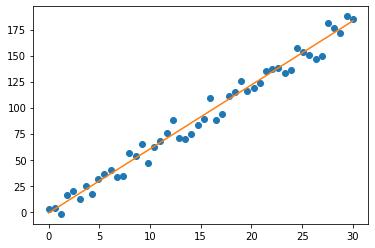

In [9]:
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {X : x, Y : y})
    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X : x, Y : y})
      print('Epochs %f Cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))
  Weight = sess.run(W)
  Bias = sess.run(B)

  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train,Weight*x_train+Bias)
  plt.show()

In [10]:
# Create the model for regression
with tf.name_scope("Model") as scope:
  prediction = W*X + B

# Add summary to study behaviour of weights and biases with epochs
weight_histogram = tf.summary.histogram("Weights", W)
bias_histogram = tf.summary.histogram("Bias", B)

# Cost function
with tf.name_scope("Cost_function") as scope:
  cost_iteration = tf.reduce_sum((prediction-Y)**2)/(2*sample_points)

# Record the scalar summary of the cost function
cost_summary = tf.summary.scalar("Cost", cost_iteration)

In [11]:
#Define the optimizer
with tf.name_scope("Training") as scope:
  optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

# Initialize the variables
init = tf.global_variables_initializer()

#Merge all the summaries into a single operator
merged_summary = tf.summary.merge_all()

Epochs 0.000000 Cost 0.690535 Weight 5.904982 Bias -0.525628
Epochs 40.000000 Cost 0.027731 Weight 6.129869 Bias -0.627687
Epochs 80.000000 Cost 0.027193 Weight 6.133935 Bias -0.733406
Epochs 120.000000 Cost 0.026709 Weight 6.137617 Bias -0.829139
Epochs 160.000000 Cost 0.026275 Weight 6.140951 Bias -0.915827
Epochs 200.000000 Cost 0.025885 Weight 6.143970 Bias -0.994325
Epochs 240.000000 Cost 0.025535 Weight 6.146704 Bias -1.065407
Epochs 280.000000 Cost 0.025219 Weight 6.149179 Bias -1.129775


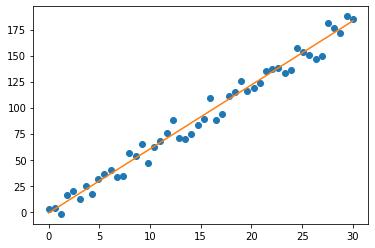

In [12]:
# Define the tensorflow session
with tf.Session() as sess:
  sess.run(init)
  writer = tf.summary.FileWriter('./log', sess.graph)
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {X : x, Y : y})

      # Write logs for each epochs
      summary_epochs = sess.run(merged_summary, feed_dict = {X : x, Y : y})
      writer.add_summary(summary_epochs, epoch)
    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X : x, Y : y})
      print('Epochs %f Cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))
  Weight = sess.run(W)
  Bias = sess.run(B)

  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train,Weight*x_train+Bias)
  plt.show()


In [13]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
 !wget https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-freebsd-amd64.tgz


--2022-10-21 05:34:23--  https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-freebsd-amd64.tgz
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 18.205.222.128, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8380303 (8.0M) [application/octet-stream]
Saving to: ‘ngrok-v3-stable-freebsd-amd64.tgz’

ngrok-v3-stable-fre 100%[===================>]   7.99M  3.83MB/s    in 2.1s    

2022-10-21 05:34:26 (3.83 MB/s) - ‘ngrok-v3-stable-freebsd-amd64.tgz’ saved [8380303/8380303]



In [15]:
!unzip ngrok-v3-stable-linux-amd64.zip

unzip:  cannot find or open ngrok-v3-stable-linux-amd64.zip, ngrok-v3-stable-linux-amd64.zip.zip or ngrok-v3-stable-linux-amd64.zip.ZIP.


In [16]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [17]:
get_ipython().system_raw('./ngrok http 6006 &')

In [18]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/lib/python3.7/json/__init__.py", line 296, in load
    parse_constant=parse_constant, object_pairs_hook=object_pairs_hook, **kw)
  File "/usr/lib/python3.7/json/__init__.py", line 348, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.7/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.7/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)


In [19]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
# Import the dependencies
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [21]:
from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets("./data", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Instructions for updating:
Please use tf.data to implement this functionality.


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./data/train-images-idx3-ubyte.gz


Instructions for updating:
Please use tf.data to implement this functionality.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/t10k-images-idx3-ubyte.gz


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [22]:
num_training = mnist_data.train.num_examples
num_testing = mnist_data.test.num_examples
num_validation = mnist_data.validation.num_examples
print("MNIST Datasize: Training samples: {0}, Testing samples: {1}")

MNIST Datasize: Training samples: {0}, Testing samples: {1}


In [23]:
# Network parameters of Neural Network
n_input = 784     # Input image of size 28 x 28
n_hidden_1 = 512  # First hidden layer
n_hidden_2 = 256  # Second hidden layer
n_hidden_3 = 128  # Third hidden layer
n_output = 10     # Output layer having (0-9) digits

In [24]:
learning_rate = 1e-4
epochs = 3000
batch_size = 128
keep_prob = tf.placeholder(tf.float32)

In [25]:
# Building tensorflow graph

X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_output])


In [26]:
nn_weight = {"W1": tf.Variable(tf.truncated_normal([n_input, n_hidden_1], stddev = 0.1)),
             "W2": tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2], stddev = 0.1)),
             "W3": tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3], stddev = 0.1)),
             "Wout":tf.Variable(tf.truncated_normal([n_hidden_3, n_output]))
}

nn_bias = { "B1": tf.Variable(tf.truncated_normal([n_hidden_1])),
            "B2": tf.Variable(tf.truncated_normal([n_hidden_2])),
            "B3": tf.Variable(tf.truncated_normal([n_hidden_3])),
            "B4": tf.Variable(tf.truncated_normal([n_output])),  
           }

In [27]:
nn_layer_1 = tf.add(tf.matmul(X, nn_weight["W1"]),nn_bias["B1"])
nn_layer_2 = tf.add(tf.matmul(nn_layer_1, nn_weight["W2"]),nn_bias["B2"])
nn_layer_3 = tf.add(tf.matmul(nn_layer_2, nn_weight["W3"]),nn_bias["B3"])
layer_drop = tf.nn.dropout(nn_layer_3, keep_prob)
output_layer = tf.add(tf.matmul(layer_drop, nn_weight["Wout"]), nn_bias["B4"])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [28]:
# Define the loss
computed_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = output_layer, labels = Y))

# Define the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(computed_loss)

#Define prediction
prediction_out = tf.equal(tf.argmax(output_layer,1), tf.argmax(Y,1))

# Define accuracy of the model
nn_accuracy = tf.reduce_mean(tf.cast(prediction_out, tf.float32))

# Initialize all the variables
init = tf.global_variables_initializer()

saver = tf.train.Saver()

In [29]:
# Executing the computational graph

with tf.Session() as sess:
  sess.run(init)
  for i in range(epochs):

    mini_batch_x, mini_batch_y = mnist_data.train.next_batch(batch_size)
    #print(mini_batch_x[0:1,:].shape)
    mini_batch_val_x, mini_batch_val_y = mnist_data.validation.next_batch(batch_size)

    sess.run(optimizer, feed_dict = {X : mini_batch_x, Y : mini_batch_y, keep_prob:1})
    
    if i%100 == 0:
      mini_batch_loss, mini_batch_accuracy = sess.run([computed_loss, nn_accuracy], feed_dict = {X: mini_batch_x, Y: mini_batch_y, keep_prob:1})

      mini_batch_val_loss, mini_batch_val_accuracy = sess.run([computed_loss, nn_accuracy], feed_dict = {X: mini_batch_x, Y: mini_batch_y, keep_prob:1})

      print("Iterations : {0} , Train_loss = {1}, Train_Accuracy {2}, Val_loss {3}, Val_accuracy {4}".format(i, mini_batch_loss, mini_batch_accuracy, mini_batch_val_loss, mini_batch_val_accuracy))

  print("Optimization Finished")
  test_accuracy = sess.run(nn_accuracy, feed_dict = {X:mnist_data.test.images, Y:mnist_data.test.labels, keep_prob:1.0})
  print("Testing accuracy is {0}".format(test_accuracy))

  saver_path = saver.save(sess, "./model/my_model.ckpt")
      

Iterations : 0 , Train_loss = 43.987117767333984, Train_Accuracy 0.0703125, Val_loss 43.987117767333984, Val_accuracy 0.0703125
Iterations : 100 , Train_loss = 9.167219161987305, Train_Accuracy 0.46875, Val_loss 9.167219161987305, Val_accuracy 0.46875
Iterations : 200 , Train_loss = 5.658229827880859, Train_Accuracy 0.59375, Val_loss 5.658229827880859, Val_accuracy 0.59375
Iterations : 300 , Train_loss = 4.232343673706055, Train_Accuracy 0.703125, Val_loss 4.232343673706055, Val_accuracy 0.703125
Iterations : 400 , Train_loss = 2.1016554832458496, Train_Accuracy 0.7421875, Val_loss 2.1016554832458496, Val_accuracy 0.7421875
Iterations : 500 , Train_loss = 3.2338309288024902, Train_Accuracy 0.71875, Val_loss 3.2338309288024902, Val_accuracy 0.71875
Iterations : 600 , Train_loss = 4.153654098510742, Train_Accuracy 0.734375, Val_loss 4.153654098510742, Val_accuracy 0.734375
Iterations : 700 , Train_loss = 2.460521936416626, Train_Accuracy 0.8046875, Val_loss 2.460521936416626, Val_accurac

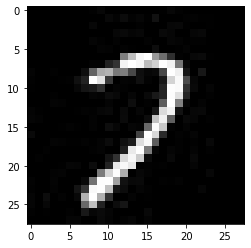

Prediction for test image is [7]


In [31]:

img = cv2.imread("7.jpg")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

rescaled_image = cv2.resize(gray_image, (28,28))
plt.imshow(rescaled_image, cmap = 'gray')
plt.show()
rescaled_image.shape
#test_image = rescaled_image.flatten()

dum = rescaled_image.reshape(1,-1)/255
dum.shape
with tf.Session() as sess:
  saver.restore(sess, "./model/my_model.ckpt")
  Z = output_layer.eval(feed_dict = {X:dum, keep_prob:1.0})
  y_pred = np.argmax(Z, axis = 1)
  print("Prediction for test image is {0}".format(y_pred))